In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

### Görüntü Okuma

In [2]:
def get_matrix_from_file(path: str) -> np.ndarray:
    return cv2.imread(path)

bitmap = get_matrix_from_file('original.png')

### Sonuçları Görüntüleme
*  Orijinal kodda, görüntüleri cv2 kitaplığını kullanarak gösteriyoruz, ancak görüntüleri defterde rahatça görüntülemek için matplotlib kitaplığını kullanacağız.

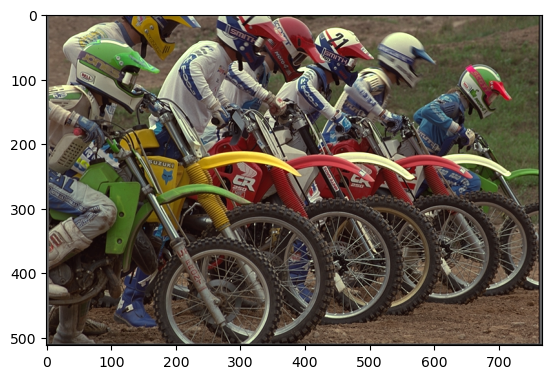

In [3]:
def show_matrix(matrix: np.ndarray, cmap=None):
    if cmap == 'BGR':
        matrix = cv2.cvtColor(matrix, cv2.COLOR_BGR2RGB)
        # BGR’i RGB olarak dönüştürür.OpenCV renkleri RGB değil de tam tersi BGR olarak okumaktadır.
        # OpenCV ile Pillow modülü aynı anda kullanınca karmaşıklık ortaya çıkmaktadır. 
        # Bu yüzden resimler OpenCV’de kayıt edilirken RGB’ye dönüştürülmesi gerekiyor.
    if cmap == 'YCrCb':
        matrix = cv2.cvtColor(matrix, cv2.COLOR_YCrCb2RGB)
    plt.imshow(matrix)

show_matrix(bitmap, 'BGR')

### Entropi Hesaplama
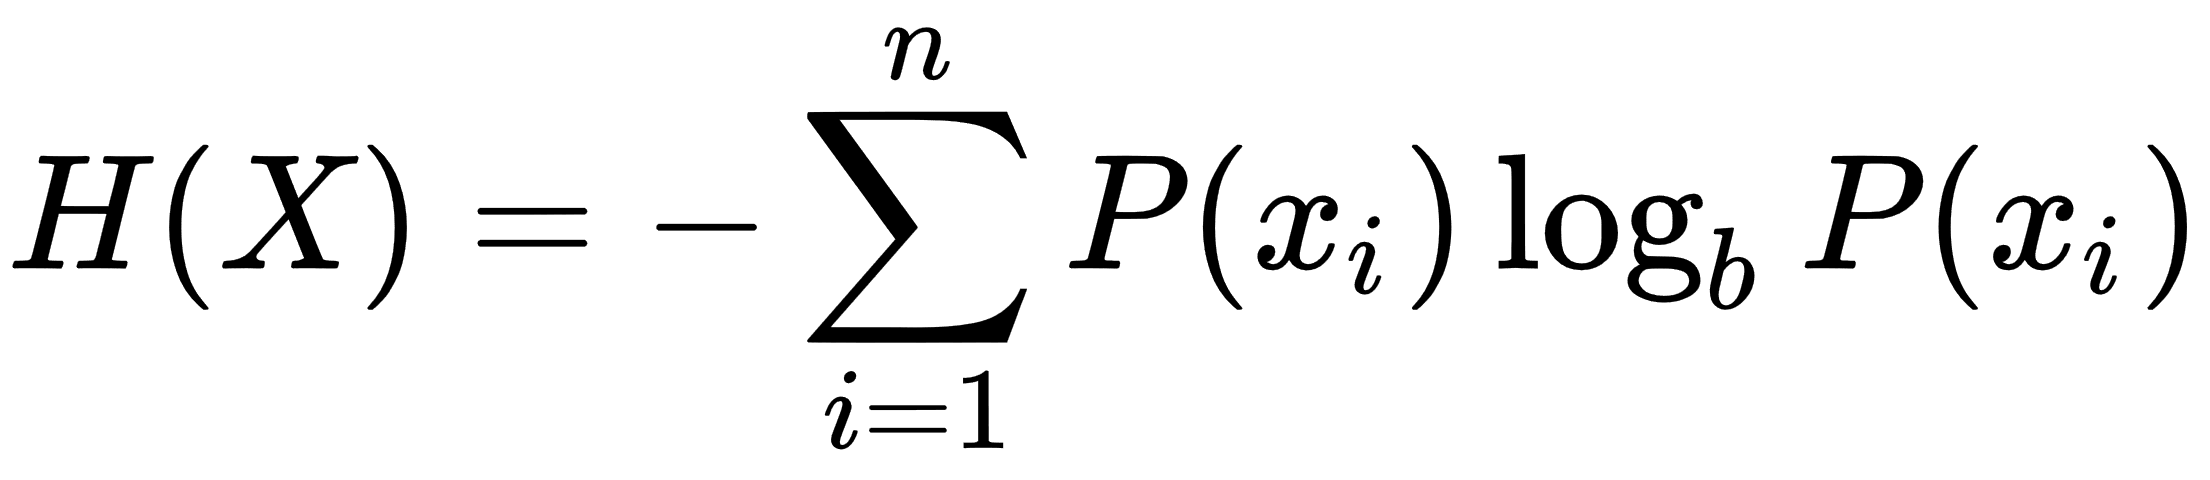

Entropiyi hesaplamak için, önce matristeki her benzersiz değerin olasılığını (frekansını) hesaplamalıyız. Bu nedenle, frekansı hesaplayan bir fonksiyon yazacağız ve sonra onu entropiyi hesaplamak için kullanacağız.

In [4]:
def __get_frequencies(matrix: np.ndarray, elements_count: int) -> list:
    return [c / elements_count for c in np.unique(matrix, return_counts=True)[1]]


def __get_entropy(freqs: list) -> float:
    return -sum(p * math.log2(p) for p in freqs)


def entropy(matrix: np.ndarray) -> float:
    return __get_entropy(__get_frequencies(matrix, np.prod(matrix.shape)))

In [5]:
bitmap.shape # satır sütun renk

(512, 768, 3)

**np.prod():** Belirli bir eksen üzerinde dizi öğelerinin çarpımını döndürür.

In [6]:
np.prod(bitmap.shape) == bitmap.shape[0] * bitmap.shape[1] * bitmap.shape[2]

True

In [7]:
np.unique(bitmap, return_counts=True) # True - her benzersiz öğenin ar öğesinde görünme sayısını da döndürür .

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

* İlk matris benzersiz değerlerdir ve ikinci matris bunların frekansıdır. Belirli değerlerin kendileriyle gerçekten ilgilenmiyoruz, sadece göründükleri sayılarla ilgileniyoruz, bu nedenle ikinci matrisi kullanıyoruz.

In [8]:
entropy(bitmap)

7.464190900258436

### Görüntüyü Kırpalım

* Matrisi 8x8'lik matrislere böldüğümüz için boyutu 8'e bölünmeyen bir resimle uğraşmamız gerekecek.
* Birkaç seçenek var
    1. Kalan pikselleri silin - bu görüntüye zarar veriyor.
    2. Üst üste binen piksellere sahip matrisler olacak şekilde, kalan pikselleri onları içeren 8x8 matrise ekleyin.
    3. Pikselleri oldukları gibi bırakın.
    4. Başka bir şekle sahip ancak eşit miktarda değere sahip matrisler oluşturun (4x16, 2x32, 1x64)

Anlamayı kolaylaştırmak için tam olarak ilk seçeneği seçtik. Görüntüyü dengelemek için kalan pikselleri görüntünün 2 kenarına ayırdık.


(512, 768, 3)

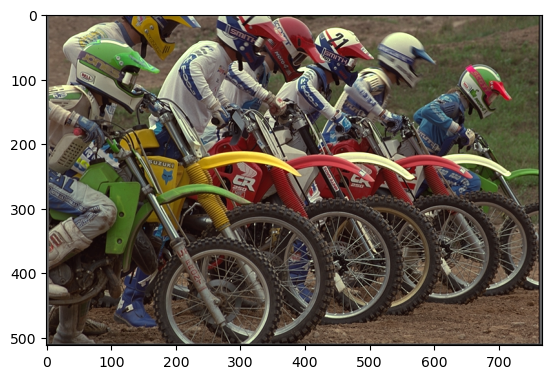

In [9]:
def crop_bitmap(bitmap: np.ndarray) -> np.ndarray:
    return bitmap[math.floor(bitmap.shape[0] % 8 / 2):bitmap.shape[0] - math.ceil(bitmap.shape[0] % 8 / 2),
                  math.floor(bitmap.shape[1] % 8 / 2):bitmap.shape[1] - math.ceil(bitmap.shape[1] % 8 / 2)]
bitmap = crop_bitmap(bitmap)
show_matrix(bitmap, cmap='BGR')
bitmap.shape

## RGB - YCrBr
             
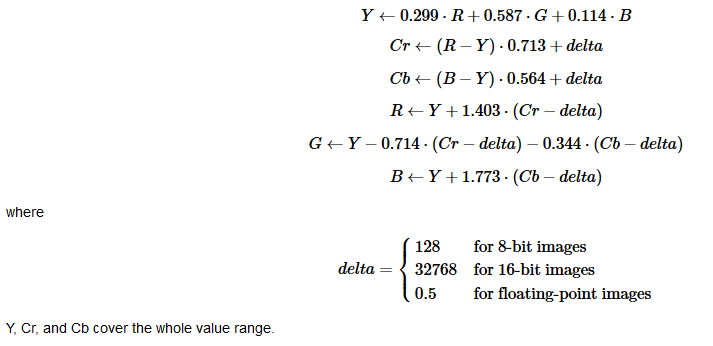

In [10]:
# bilgi: OpenCV, RGB sıralamasını değil, BGR sıralamasını kullanır.

from typing import List

def bgr_pixel_to_ycrcb(bgr: list) -> List[int]:
    return [
        round(0.299 * bgr[2] + 0.587 * bgr[1] + 0.114 * bgr[0]),  # Y'
        round((bgr[2] - round((0.299 * bgr[2] + 0.587 * bgr[1] + 0.114 * bgr[0]))) * 0.713 + 128),  # Cr
        round((bgr[0] - round((0.299 * bgr[2] + 0.587 * bgr[1] + 0.114 * bgr[0]))) * 0.564 + 128)  # Cb
    ]

def ycrcb_pixel_to_bgr(ycrcb: list) -> List[int]:
    return [
        round(ycrcb[0] + 1.773 * (ycrcb[2] - 128)),  # B
        round(ycrcb[0] - 0.714 * (ycrcb[1] - 128) - 0.344 * (ycrcb[2] - 128)),  # G
        round(ycrcb[0] + 1.403 * (ycrcb[1] - 128))  # R
    ]

def bgr_to_ycrcb(matrix3d: np.ndarray) -> np.ndarray:
    return np.apply_along_axis(bgr_pixel_to_ycrcb, 2, matrix3d)

def ycrcb_to_bgr(matrix3d: np.ndarray) -> np.ndarray:
    return np.apply_along_axis(ycrcb_pixel_to_bgr, 2, matrix3d).clip(0, 255).astype(np.uint8)

bitmap = bgr_to_ycrcb(bitmap)

print("BGR:")
print(bitmap[1,1])

print("Y'CrCb:")
print(bitmap[1,1])

BGR:
[ 99 128 128]
Y'CrCb:
[ 99 128 128]


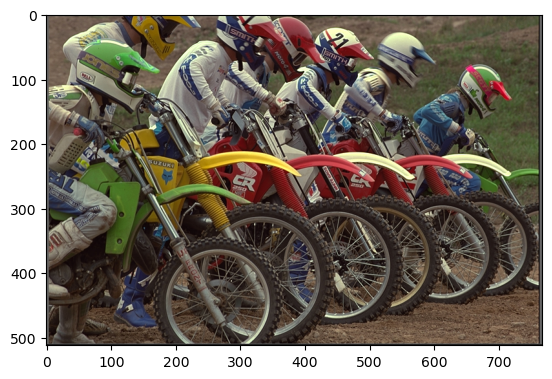

In [11]:
show_matrix(ycrcb_to_bgr(bitmap), cmap='BGR')

## Renkleri Ayıralım
* Sıkıştırma işleminde her renk üzerinde ayrı ayrı çalışıyoruz.

In [12]:
def split_to_three_colors(matrix: np.ndarray) -> List[np.ndarray]:
    return [
        matrix[..., 0],
        matrix[..., 1],
        matrix[..., 2]
    ]

y, cr, cb = split_to_three_colors(bitmap)

print("Y: \n", y)
print("Cr: \n", cr)
print("Cb: \n", cb)

[y[1,1], cr[1,1], cb[1,1]] == bitmap[1,1]  # Doğru parçalanmış mı kontrol ediyoruz.

print("\n\nY[1,1]: ", y[1,1])
print("Cr[1,1]: ", cr[1,1])
print("Cb[1,1] : ", cb[1,1])
print("İmage[1,1]: ", bitmap[1,1]) 

Y: 
 [[ 99  99  99 ...  99  99  99]
 [ 99  99  99 ...  99  99  99]
 [ 99  99  99 ... 100  99  99]
 ...
 [ 99  99  99 ... 109  97  99]
 [ 99  99  99 ...  97  99  99]
 [  0   0   0 ...   0   0   0]]
Cr: 
 [[128 128 128 ... 128 128 128]
 [128 128 128 ... 128 128 128]
 [128 128 128 ... 128 128 128]
 ...
 [128 128 128 ... 129 128 128]
 [128 128 128 ... 128 128 128]
 [128 128 128 ... 128 128 128]]
Cb: 
 [[128 128 128 ... 128 128 128]
 [128 128 128 ... 128 128 128]
 [128 128 128 ... 128 128 128]
 ...
 [128 128 128 ... 127 128 128]
 [128 128 128 ... 128 128 128]
 [128 128 128 ... 128 128 128]]


Y[1,1]:  99
Cr[1,1]:  128
Cb[1,1] :  128
İmage[1,1]:  [ 99 128 128]


## Alt Örnekleme
<div class="alert alert-block alert-info">
İnsan retinası, yapısı nedeniyle bir görüntüdeki renk verisini parlaklık verisine göre daha düşük çözünürlükte görür. Dolayısıyla renk verisinin parlaklığa göre daha düşük bir çözünürlükte örneklenmesi, çoğunlukla hissedilir bir değişikliğe neden olmaz. JPEG, yatayda ve/veya düşeyde renk verisinin parlaklığın yarısı çözünürlükte örneklenmesine imkân verir. 
</div>

* Luma bilgisinden ayrı kullanılan renk bilgisi genelde bant genişliği tasarrufu için örnekleme yolu ile düşürülür. Kullanılan örnekleme oranları J:a:b şeklinde ifade edilir. Örnekleme oranı J sayısı kadar (genelde 4 kabul edilir) pixel eninde ve 2 pixel yüksekliğinde, 8 pixel içeren bir dörtgen alanı referans alır.
    * J: Referans alanının genişliği ( genelde 4 )
    * a: Örneklemenin ilk sırasındaki renk bilgisi (Cr, Cb) içeren pixel sayısı.
    * b: Örneklemenin ikinci sırasındaki pixellerdeki renk bilgisi içeren pixel sayısı.
    
    Yani 4:2:0 formatındaki bir videoda ilk 8 pixellik bir örnekleme alanının ilk satırında 2 renk bilgisi içeren pixel vardır. İkinci satırda renk bilgisi olmaması ilk satırdaki bilginin alt değer için de kullanılacağını ifade eder.
    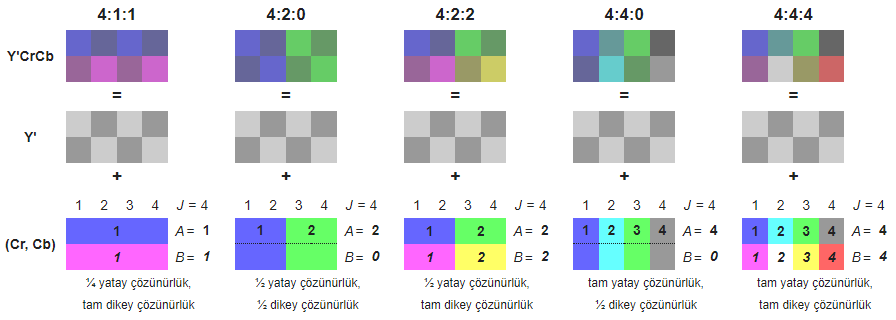
    
    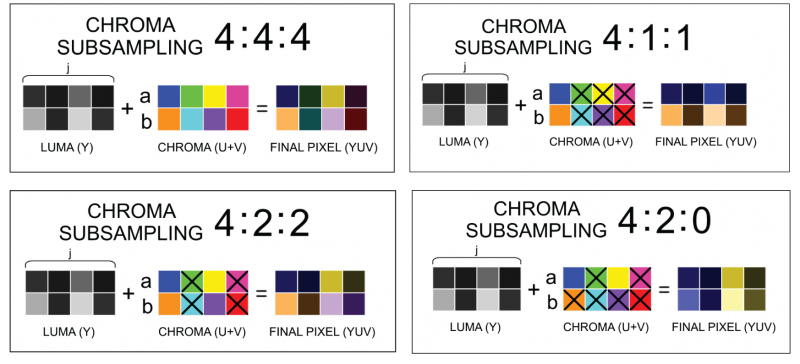

* JPEG görüntüleri için alt örneklemenin yapıldığı oranlar 
    * 4:4:4 = Örnekleme olmaksızın tüm kanallar tam çözünürlükte bilgi içerir. 
    * 4:2:2 = Yatayda tam renk bilgisi çözünürlüğü, dikeyde ise yarı renk bilgisi çözünürlüğü içerir.
    * 4:2:0 = Yatayda ve dikeyde yarı çözünürlük içerir.

* **Alt örnekleme**, piksel sayısını azaltmaktır. Alt örnekleme yaptığınızda bilgiler görüntüden silinir.
* **Üst örnekleme**, piksel sayısını artırmaktır. Üst örnekleme yaptığınızda yeni pikseller eklenir.

In [13]:
def downsample(matrix: np.ndarray):
    return matrix[::2, ::2]


def upsample(matrix: np.ndarray) -> np.ndarray:
    return matrix.repeat(2, axis=0).repeat(2, axis=1) 

# np.repeat(): Verilen eksen boyunca dizinin öğelerini tekrarlar.
# dizi: [0 1 2 3 4]
# dizi 2 kez tekrarlanıyor: [0 0 1 1 2 2 3 3 4 4]

cr_downsample = downsample(cr)
cb_downsample = downsample(cb)

#**************************
cr_upsample = upsample(cr)
cb_upsample = upsample(cb)
#**************************

print("Cr: ", cr.shape)
print("Cr Downsample: ", cr_downsample.shape)
print("Cr Upsample: ", cr_upsample.shape)

Cr:  (512, 768)
Cr Downsample:  (256, 384)
Cr Upsample:  (1024, 1536)


# 8x8 alt matrislere ayırma

In [14]:
def split_matrix_into_sub_matrices(matrix: np.ndarray) -> List[np.ndarray]:
    return [
        np.array([
            [
                matrix[row_index][col_index]
                for col_index in range(col, min(col + 8, len(matrix[0])))
            ]  # row in matrix
            for row_index in range(row, min(row + 8, len(matrix)))
        ])  # 8*8 matrix
        for row in range(0, len(matrix), 8) # satır: 0-512 arasında 8 er adım atla -> 0-8-16-24-.....-488,496,504
        for col in range(0, len(matrix[0]), 8)  # sütun: 0-768 arasında 8 er adım atla -> 0-8-16-....-744-752-760
    ]

y_split = split_matrix_into_sub_matrices(y)
cr_split = split_matrix_into_sub_matrices(cr_downsample)
cb_split = split_matrix_into_sub_matrices(cb_downsample)

print(y_split[1].shape)
print(cr_split[1].shape)
print(cb_split[1].shape)

(8, 8)
(8, 8)
(8, 8)


In [15]:
split_matrix_into_sub_matrices(y)

[array([[ 99,  99,  99,  99,  99,  99,  99,  99],
        [ 99,  99,  99,  99,  99,  99,  99,  99],
        [ 99,  99,  99,  99,  99,  98,  98,  98],
        [ 99,  99,  99,  99,  98,  95,  96,  93],
        [ 99,  99,  99,  99,  99,  97,  98,  98],
        [ 99,  99,  99,  99,  99,  98,  96,  99],
        [ 99,  99,  99,  99,  98,  97,  99, 103],
        [ 99,  99,  99,  99, 102, 105, 104, 106]]),
 array([[ 99,  99,  99,  99,  99,  99,  99,  99],
        [ 99,  99,  99,  99,  99,  99,  99,  99],
        [ 99,  99,  98,  99,  99, 100, 100, 100],
        [ 93,  96,  95,  99, 100, 104, 112, 118],
        [ 96,  99, 102, 100, 100, 106, 112, 119],
        [102, 102, 103, 103,  99, 104, 110, 114],
        [103, 106, 106, 103, 102, 106, 104, 107],
        [109, 109, 106, 103, 104, 103, 100, 103]]),
 array([[ 99,  99,  99,  99,  99,  99,  99,  99],
        [ 99,  99,  99,  99,  99,  99,  99,  99],
        [100, 100,  99,  99,  99,  98,  99,  98],
        [120, 114, 106, 103,  96,  96,  98,  9

# Discrete Cosine Transform (DCT)
Denklem’de N×M boyutlu bir f(x,y) imgesinin DCT formülü görülmektedir.

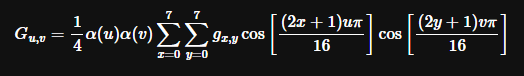
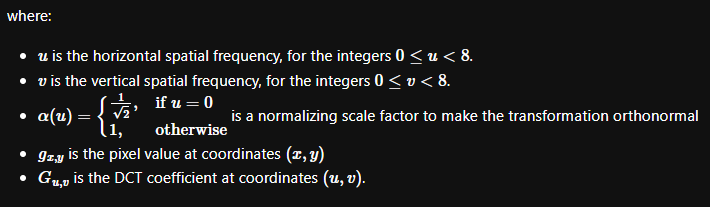


<div class="alert alert-block alert-info">
Orijinal bloktaki her öğeden aralığın orta noktası (128 değeri) çıkarıldıktan sonra sıfır etrafında ortalanan veri aralığı üretilir, böylece değiştirilen aralık [0,255] 'ten  [-128,127] 'ye kaydırılır.
</div>  

In [16]:
def normalize_to_zero(matrix: np.ndarray) -> np.ndarray:
    return matrix - 128

def cos_element(x, u):
    return math.cos((2 * x + 1) * u * math.pi / 16)

def alpha(u):
    return 1 / math.sqrt(2) if u == 0 else 1

def g_uv(u, v, matrix):
    return (1 / 4) * alpha(u) * alpha(v) * sum( matrix[x][y] * cos_element(x, u) * cos_element(y, v)
                                                for x in range(len(matrix)) #satır
                                                for y in range(len(matrix[0])) #sütun
                                              )

def discrete_cosine_transform(matrix: np.ndarray) -> np.ndarray:
    return np.array([ [g_uv(y, x, matrix) for x in range(len(matrix[y]))]
                      for y in range(len(matrix))
                    ])

def dct(matrix: np.ndarray) -> np.ndarray:
    return discrete_cosine_transform(normalize_to_zero(matrix))

y_dct = [dct(sub_matrix) for sub_matrix in y_split]
cr_dct = [dct(sub_matrix) for sub_matrix in cr_split]
cb_dct = [dct(sub_matrix) for sub_matrix in cb_split]

In [17]:
print(len(y_dct), "\n")
print(len(y_dct[0]), "\n")

print(y_dct[0])

6144 

8 

[[-2.32375000e+02  2.79173466e-01  3.94290254e-01 -1.13972367e+00
   1.37500000e+00 -8.23810312e-01 -2.80213456e-02  3.63219905e-01]
 [-4.03462640e+00  4.49682546e+00 -2.13386808e+00  7.81573289e-01
  -9.25152725e-01  1.30677994e+00 -9.99960016e-01  3.84006384e-01]
 [ 6.91069055e+00 -7.38861391e+00  2.54549513e+00  5.72348954e-01
  -4.89961112e-01 -8.77472470e-01  1.39016504e+00 -8.48913080e-01]
 [-2.24344732e+00  2.05197224e+00  1.26145206e-01 -1.32075382e+00
   1.03598524e+00 -3.98198487e-01  2.52472047e-01 -2.69134313e-01]
 [ 1.12500000e+00 -7.11092056e-01 -9.12272711e-01  1.60154600e+00
  -1.12500000e+00  5.82632472e-01 -5.69217446e-01  5.26723757e-01]
 [-3.32442637e+00  3.03690127e+00  8.42875319e-02 -1.48918874e+00
   5.67680605e-01  6.69103390e-01 -7.51802473e-01  2.41312068e-01]
 [ 1.33176802e+00 -8.86286002e-01 -8.59834957e-01  1.30121696e+00
  -2.02948538e-01 -8.98368282e-01  9.54504871e-01 -4.23622310e-01]
 [ 1.25476026e+00 -1.70698387e+00  1.45950605e+00 -9.96119

# Quantization - Niceleme
Araştırılmış, test edilmiş ve en uygun olduğu tespit edilmiş sabit bir 8x8 matrisimiz var. Aldığımız DCT matrisindeki her öğe, normal matristeki karşılık gelen öğeye bölünür. Matristeki sayıların indekslerine göre arttığını görebilirsiniz.

Bölme işleminden sonra yüksek indekslerdeki değerler daha düşük olacaktır. Değerlerin çoğu 0-1 arasında olacak ve aşağı yuvarladığımızda 0 olacak.

In [18]:
quantization_matrix = np.array([
    [16, 11, 10, 16, 24, 40, 51, 61],
    [12, 12, 14, 19, 26, 58, 60, 55],
    [14, 13, 16, 24, 40, 57, 69, 56],
    [14, 17, 22, 29, 51, 87, 80, 62],
    [18, 22, 37, 56, 68, 109, 103, 77],
    [24, 35, 55, 64, 81, 104, 113, 92],
    [49, 64, 78, 87, 103, 121, 120, 101],
    [72, 92, 95, 98, 112, 100, 103, 99]
])

def quantization(submatrix: np.ndarray) -> np.ndarray:
    return np.array([[round(submatrix[row, col] / quantization_matrix[row, col])
                      for col in range(len(submatrix[row]))]
                     for row in range(len(submatrix))])

y_quantization = [quantization(submatrix) for submatrix in y_dct]
cb_quantization = [quantization(submatrix) for submatrix in cb_dct]
cr_quantization = [quantization(submatrix) for submatrix in cr_dct]

y_quantization[1]

array([[-13,  -1,   1,   0,   0,   0,   0,   0],
       [ -2,   0,   0,   0,   0,   0,   0,   0],
       [  0,   2,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0]])

In [19]:
y_quantization[6143]

array([[-24,   2,  13,   2,  -5,  -2,   1,   0],
       [  8,   0,   4,   0,  -2,  -1,   0,   0],
       [ -9,  -2,  -3,   0,   1,   1,   0,   0],
       [  8,   1,   1,   1,   0,   0,   0,   0],
       [ -5,   0,   0,   0,   0,   0,   0,   0],
       [  4,   0,   0,   0,   0,   0,   0,   0],
       [ -1,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0]])

In [20]:
np.array(y_quantization).shape[0]

6144

In [21]:
len(y_quantization[0])

8

In [22]:
type(cb_quantization)

list

# Entropy
Bu noktada frekans sıkıştırması ile sıkıştırabiliriz, örneğin Hoffman. Değerler artık çok daha sınırlı bir aralıkta ve sonuç olarak kendilerini daha fazla tekrar edecekler. Ek olarak, değerlerin çoğu 0'dır.

In [23]:
entropy(np.dstack([np.dstack(y_quantization), np.dstack(cb_quantization), np.dstack(cr_quantization)]))

1.3644242404925289